# Data Exploration

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import STL

In [97]:
data0=pd.read_excel('kkh.xlsx')

In [98]:
data = data0.copy()
data.set_index('Tarih', inplace=True)
print(data)

                   KKH
Tarih                 
5.1.2018    13278392.0
12.1.2018   12928708.0
19.1.2018   13649444.0
26.1.2018   14049236.0
2.2.2018    16340048.0
...                ...
25.8.2023  176168718.0
1.9.2023   191097164.0
8.9.2023   177703919.0
15.9.2023  182453161.0
22.9.2023  180537727.0

[299 rows x 1 columns]


In [99]:
df=data['KKH']

In [100]:
df.describe()

count    2.990000e+02
mean     4.473060e+07
std      4.250391e+07
min      1.142237e+07
25%      1.771075e+07
50%      2.324856e+07
75%      5.310155e+07
max      1.910972e+08
Name: KKH, dtype: float64

## Data Normalizing

In [108]:
df.mean()

44730595.01839465

In [109]:
df.std()

42503913.67381021

In [101]:
normal_df=(df-(df.mean()))/(df.std())

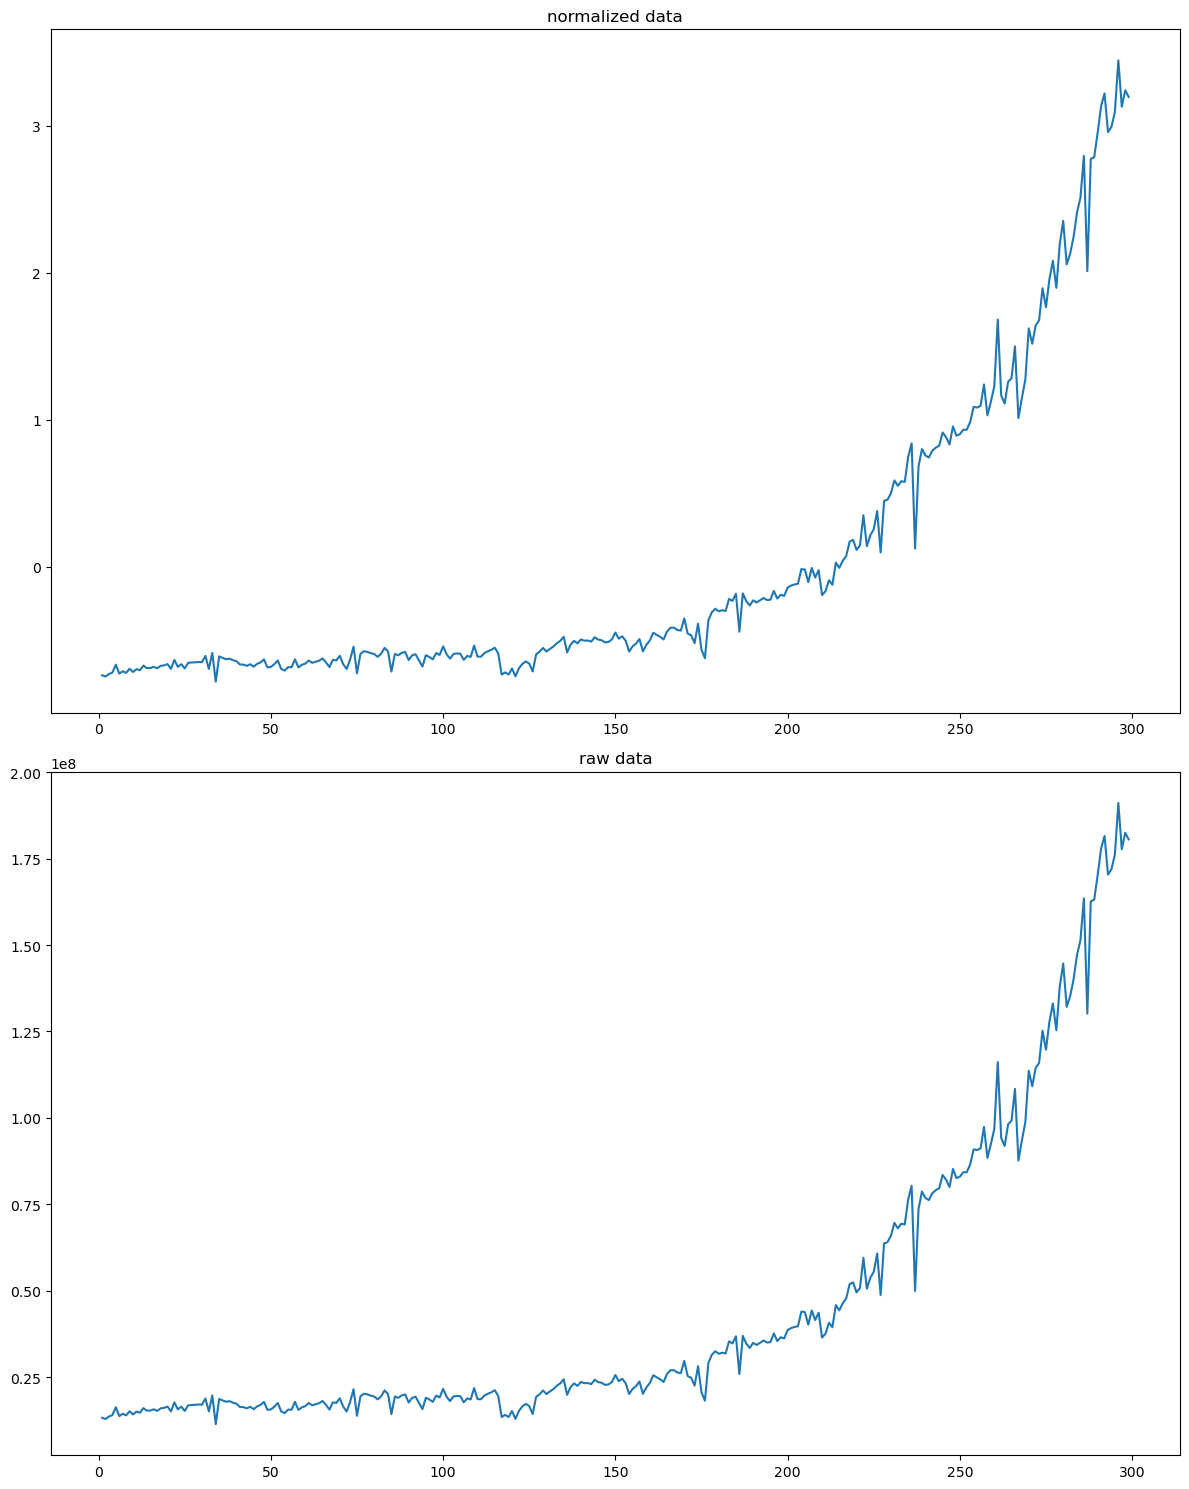

In [102]:
fig, axs=plt.subplots(2,1, figsize=(12,15))
axs[0].plot(range(1,300),normal_df.values)
axs[0].set_title('normalized data')
axs[1].plot(range(1,300),df)
axs[1].set_title('raw data')
plt.tight_layout()
plt.show()

In [103]:
print(f'{normal_df.index[0]} - {normal_df.index[120]}')

5.1.2018 - 24.4.2020


In [104]:
normal_df.index[150]

'20.11.2020'

## Decomposing Trend, Seasonal Effects and Residuals

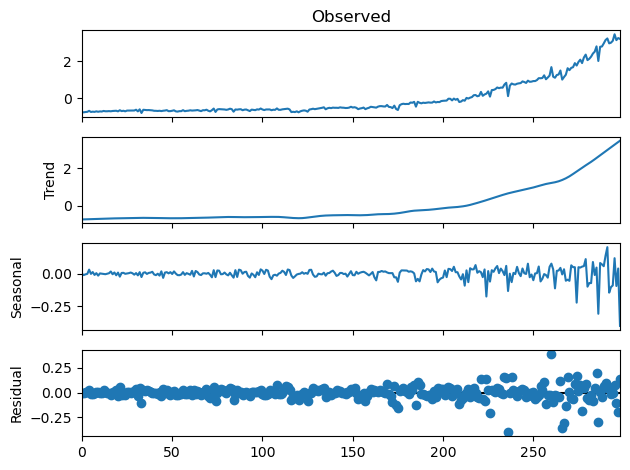

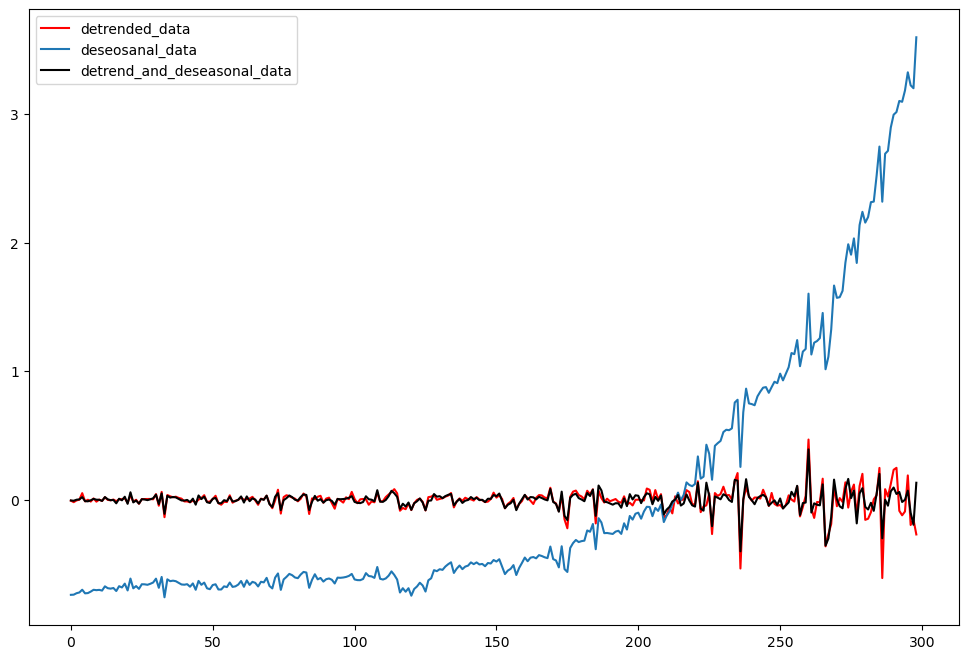

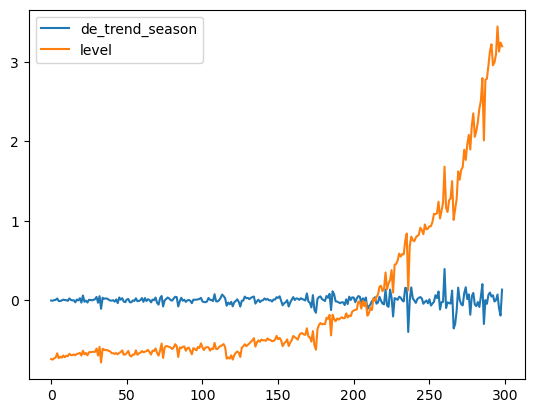

In [105]:
stl = STL(normal_df.values, period=12)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid
result.plot()
plt.show()
detrend=normal_df-trend
deseason=normal_df-seasonal
de_trend_season=detrend-seasonal
plt.figure(figsize=(12,8))
plt.plot(detrend.values,color='r',label='detrended_data')
plt.plot(deseason.values,label='deseosanal_data')
plt.plot(de_trend_season.values,color='black',label='detrend_and_deseasonal_data')
plt.legend()
plt.show()
plt.plot(de_trend_season.values, label='de_trend_season')
plt.plot(normal_df.values,label='level')
plt.legend()
plt.show()

In [106]:
raw="raw.xlsx"
normal_df.to_excel(raw)

According to findings which above showed, we can clearly say that there is high volatility in this series. As the main cause of this volatility, the huge increase on credit card expenses of consumers after the pandemid preiod can be stated. In such situations, eploying the econometric methods have a lot of difficulties, especially at the forecast issiues. If we can't employ the econometric methods, we can use the machine learning algorithms. Because the machine learning methods have more flexible structures, these methods are able to make modeling without the losing the long-run knowledge of the data.

##### Mustafa KARAKUZU